In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('RawDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14.0,20.0,No,11.0,Mild Pain,Low,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15.0,8.0,Yes,15.0,Ubearable Pain,High,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,43.0,18.0,Yes,14.0,Mild Pain,Low,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16.0,12.0,Yes,15.0,Strong Pain,High,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16.0,28.0,No,7.0,Mild Pain,High,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [4]:
df.dtypes

anxiety_level                   float64
self_esteem                     float64
mental_health_history            object
depression                      float64
headache                         object
blood_pressure                   object
sleep_quality                     int64
breathing_problem                 int64
noise_level                       int64
living_conditions                 int64
safety                            int64
basic_needs                       int64
academic_performance              int64
study_load                        int64
teacher_student_relationship      int64
future_career_concerns            int64
social_support                    int64
peer_pressure                     int64
extracurricular_activities        int64
bullying                          int64
stress_level                      int64
dtype: object

In [6]:
df.describe()

,anxiety_level,self_esteem,depression,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1060.000000,1060.000000,1067.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,12.500000,19.539623,14.116214,2.660000,2.753636,2.649091,2.518182,2.737273,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,8.989502,11.673207,10.026774,1.548383,1.400713,1.328127,1.119208,1.406171,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,7.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,12.000000,20.000000,12.000000,2.500000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,17.000000,26.000000,20.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,50.000000,59.000000,49.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [7]:
df.isnull().sum()

anxiety_level                   40
self_esteem                     40
mental_health_history            0
depression                      33
headache                         0
blood_pressure                   0
sleep_quality                    0
breathing_problem                0
noise_level                      0
living_conditions                0
safety                           0
basic_needs                      0
academic_performance             0
study_load                       0
teacher_student_relationship     0
future_career_concerns           0
social_support                   0
peer_pressure                    0
extracurricular_activities       0
bullying                         0
stress_level                     0
dtype: int64

## Class Distribution to find Imbalances in classes of target variable

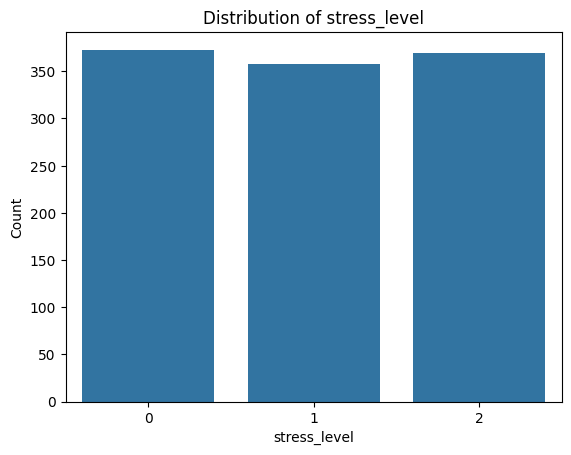

In [14]:
target_variable = "stress_level"
sns.countplot(data=df, x=target_variable)

# Add Labels
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.title(f'Distribution of {target_variable}')

plt.show()

### Observations: As all the classes have approximately equal number of counts there is no imbalances in the dataset

## Histogram with kernel density to see the skewness and outliers of numerical values

In [33]:
df.drop(columns=[target_variable]).columns.to_numpy()

array(['anxiety_level', 'self_esteem', 'mental_health_history',
       'depression', 'headache', 'blood_pressure', 'sleep_quality',
       'breathing_problem', 'noise_level', 'living_conditions', 'safety',
       'basic_needs', 'academic_performance', 'study_load',
       'teacher_student_relationship', 'future_career_concerns',
       'social_support', 'peer_pressure', 'extracurricular_activities',
       'bullying'], dtype=object)

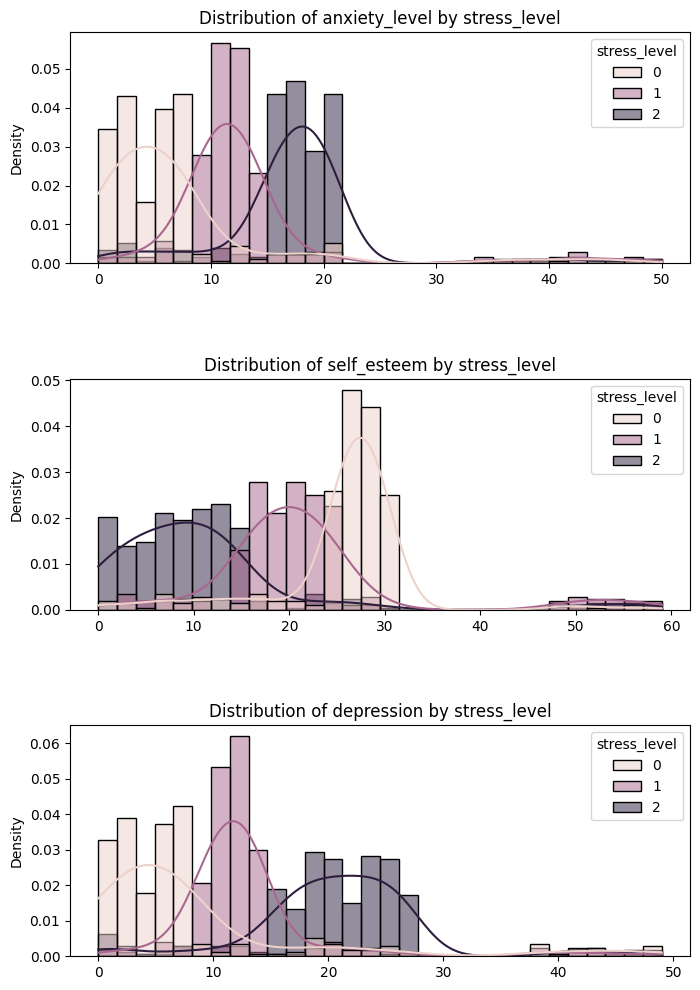

In [32]:
target_variable = 'stress_level'
feature_list = ['anxiety_level', 'self_esteem', 'depression']  # Add your feature names here

# Set up subplots
fig, axes = plt.subplots(nrows=len(feature_list), ncols=1, figsize=(8, 4 * len(feature_list)))
fig.subplots_adjust(hspace=0.5)

# Plot feature distributions by class
for i, feature in enumerate(feature_list):
    sns.histplot(data=df, x=feature, hue=target_variable, kde=True, ax=axes[i], bins=30, stat='density')
    axes[i].set_title(f'Distribution of {feature} by {target_variable}')
    axes[i].set_xlabel(None)  # Remove x-axis label for better layout

plt.show()

### Observation: The numerical values are right skewed and has outliers